In [1]:
# 畳み込みニューラルネットワークを利用した画像認識

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential # 入力層に
from keras.layers.core import Dense, Dropout, Activation, Flatten # Dropout,
Flattern多次元を一次元
from keras.layers import Conv2D, MaxPooling2D #
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# mnistデータの読み込み
#(X_train, y_train), (X_test, y_test) = mnist.load_data()      # ネット接続時は1行で読み込みできる
f = np.load("./mnist.npz")
X_train, y_train, X_test, y_test = f['x_train'], f['y_train'], f['x_test'], f['y_test']
f.close()

# 入力画像を変換
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)    # Keras入力形式に変換 #最後の１は画像のチャンネル数。
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255     # 各画素を0から1に正規化 # DeepLearningでは正規化したほうが性能がでる。
X_test = X_test.astype('float32') /255 

# 出力形式をSoftMaxの出力に合わせて確率に変換 (数字の6 だと [0,0,0,0,0,0,1,0,0,0] に) 
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print('X_train shape:', X_train.shape)      # X_trainの配列形状
print('Y_train shape:', Y_train.shape)      # Y_trainの配列形状
print(X_train.shape[0], 'train samples')    # 訓練サンプル数
print(X_test.shape[0], 'test samples')      # 評価サンプル数

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
60000 train samples
10000 test samples


6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


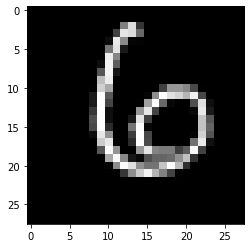

In [3]:
plt.imshow(X_test[100].reshape([28, 28]))    # 入力画像の例を表示
plt.gray()
print(y_test[100])     # 正解データ (ラベル)
print(Y_test[100])     # 正解データ (確率の配列)

In [7]:
# CNNのモデルの作成
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()        # モデル情報の表示

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [5]:
batch_size = 128         # バッチサイズ
nb_epoch = 10            # 繰り返し回数

In [6]:
# 学習パラメータの設定
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# モデルの学習
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    validation_data=(X_test, Y_test))

# 学習結果の評価
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.2761 - accuracy: 0.9180 - val_loss: 0.2276 - val_accuracy: 0.9780
Epoch 2/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0858 - accuracy: 0.9740 - val_loss: 0.1719 - val_accuracy: 0.9803
Epoch 3/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0659 - accuracy: 0.9797 - val_loss: 0.1268 - val_accuracy: 0.9873
Epoch 4/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.1168 - val_accuracy: 0.9875
Epoch 5/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.1058 - val_accuracy: 0.9869
Epoch 6/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0714 - val_accuracy: 0.9905
Epoch 7/10
60000/60000 [==============================] - 161s

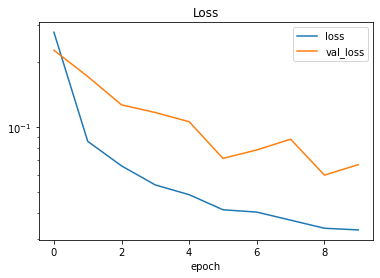

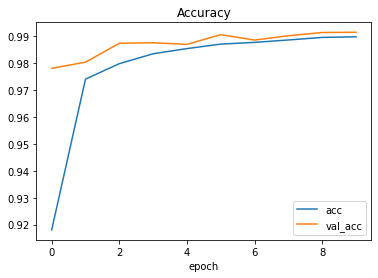

In [8]:
# 学習誤差グラフ
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Loss')
plt.legend()
plt.xlabel('epoch')
plt.yscale('log')
plt.show()

# 学習精度グラフ
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.title('Accuracy')
plt.legend(loc="lower right")
plt.xlabel('epoch')
plt.show()

In [16]:
# モデルを用いた判別 (出力層のベクトル)
model.predict(X_test)[100]

array([0.10003252, 0.09832503, 0.098148  , 0.10453936, 0.11336356,
       0.09563721, 0.0838168 , 0.12282764, 0.08600803, 0.0973018 ],
      dtype=float32)

In [17]:
# モデルを用いた判別 (ラベル)
model.predict_classes(X_test)[100]

7

In [11]:
# モデルの保存と読み込み
model.save("cnn_model.h5")

# モデルの読み込み
from keras.models import load_model
model = load_model("cnn_model.h5")

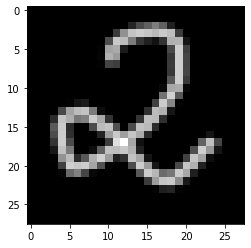

In [14]:
# 手書き文字画像の読み込み
from PIL import Image
img = Image.open("./num.png")    # 画像ファイル読み込み
img = img.resize((28, 28))       # 28×28にリサイズ
img = img.convert('L')           # グレイスケール化

vec = 255-np.array(img)              # 白黒反転
vec = vec.astype('float32') /255     # 0から1に正規化
plt.imshow(vec)
plt.gray()

In [15]:
# 手書き文字画像の認識
vec = vec.reshape(1, 28, 28, 1)     # モデルの入力形式に変換
model.predict_classes(vec)[0]       # モデルを用いた判別 (ラベル)

7